In [1]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

In [2]:
usr_eng = pd.read_csv('/Users/harishprabhala/Downloads/relax_challenge/takehome_user_engagement.csv')

In [3]:
usrs = pd.read_csv('/Users/harishprabhala/Downloads/relax_challenge/takehome_users.csv', encoding='latin-1')

In [4]:
usrs.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
usr_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [6]:
usr_eng['time_stamp'] = pd.DatetimeIndex(usr_eng['time_stamp'])

In [7]:
usr_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [8]:
usr1 = pd.DataFrame(usr_eng.groupby(['user_id','time_stamp']).count())

In [9]:
usr1.columns = ['visited']

In [10]:
usr1.head()

visited
user_id time_stamp                  
1       2014-04-22 03:53:30        1
2       2013-11-15 03:45:04        1
        2013-11-29 03:45:04        1
        2013-12-09 03:45:04        1
        2013-12-25 03:45:04        1

In [11]:
usr_eng.groupby(['user_id','time_stamp']).time_stamp.size()

user_id  time_stamp         
1        2014-04-22 03:53:30    1
2        2013-11-15 03:45:04    1
         2013-11-29 03:45:04    1
         2013-12-09 03:45:04    1
         2013-12-25 03:45:04    1
         2013-12-31 03:45:04    1
         2014-01-08 03:45:04    1
         2014-02-03 03:45:04    1
         2014-02-08 03:45:04    1
         2014-02-09 03:45:04    1
         2014-02-13 03:45:04    1
         2014-02-16 03:45:04    1
         2014-03-09 03:45:04    1
         2014-03-13 03:45:04    1
         2014-03-31 03:45:04    1
3        2013-03-19 23:14:52    1
4        2013-05-22 08:09:28    1
5        2013-01-22 10:14:20    1
6        2013-12-19 03:37:06    1
7        2012-12-20 13:24:32    1
10       2013-01-16 22:08:03    1
         2013-01-22 22:08:03    1
         2013-01-30 22:08:03    1
         2013-02-04 22:08:03    1
         2013-02-06 22:08:03    1
         2013-02-14 22:08:03    1
         2013-02-17 22:08:03    1
         2013-02-19 22:08:03    1
         2013-02-26

In [12]:
def adopted(time):
    initial_time=pd.to_datetime(time).sort_values().reset_index(drop=True)
    final_time=initial_time[2:].reset_index(drop=True)
    return 1 if ((final_time-initial_time[:-2])<=pd.Timedelta('7 days')).sum()>0 else 0

In [14]:
usr_eng['adoption']=usr_eng.groupby('user_id')['time_stamp'].apply(adopted)

In [18]:
user_adopt=usrs.merge(usr_eng,how='inner',left_on='object_id',right_index=True)

In [19]:
user_adopt.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,user_id,visited,adoption
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2013-11-15 03:45:04,2,1,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,2,1,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,2013-12-09 03:45:04,2,1,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,2013-12-25 03:45:04,2,1,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,2013-12-31 03:45:04,2,1,0.0


In [25]:
user_adopt.enabled_for_marketing_drip.value_counts()

0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64

In [24]:
user_adopt.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'time_stamp', 'user_id', 'visited', 'adoption'],
      dtype='object')

In [57]:
features = user_adopt[['creation_time','creation_source', 'opted_in_to_mailing_list','org_id','invited_by_user_id',
                      'enabled_for_marketing_drip']]

In [58]:
features['creation_time'] = pd.to_datetime(features['creation_time'])

/Users/harishprabhala/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [29]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
features['creation_source'] = encoder.fit_transform(features['creation_source'])

/Users/harishprabhala/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [30]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

/Users/harishprabhala/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [59]:
features['create_weekday']=features['creation_time'].dt.weekday
features['create_hour']=features['creation_time'].dt.hour
features['create_month']=features['creation_time'].dt.month
features['create_weekofyear']=features['creation_time'].dt.weekofyear

/Users/harishprabhala/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/harishprabhala/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/harishprabhala/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [63]:
features.columns

Index(['creation_source', 'opted_in_to_mailing_list', 'org_id',
       'invited_by_user_id', 'enabled_for_marketing_drip', 'create_weekday',
       'create_hour', 'create_month', 'create_weekofyear'],
      dtype='object')

In [98]:
features_1 = features[['opted_in_to_mailing_list', 'org_id',
       'invited_by_user_id', 'enabled_for_marketing_drip', 'create_weekday',
       'create_hour', 'create_month', 'create_weekofyear']].fillna(0).astype(np.float)

In [112]:
features_1.org_id.value_counts()

0.0      0.026583
1.0      0.019417
2.0      0.016750
3.0      0.014000
4.0      0.013250
6.0      0.011500
5.0      0.010667
9.0      0.010333
7.0      0.009917
10.0     0.008667
8.0      0.008083
14.0     0.007250
11.0     0.006250
12.0     0.006250
17.0     0.006167
18.0     0.006083
16.0     0.006000
13.0     0.006000
20.0     0.005667
15.0     0.005333
24.0     0.005250
25.0     0.005167
28.0     0.005083
23.0     0.005000
30.0     0.004917
22.0     0.004833
40.0     0.004750
33.0     0.004750
21.0     0.004667
27.0     0.004583
           ...   
305.0    0.001083
383.0    0.001083
346.0    0.001000
232.0    0.001000
301.0    0.001000
407.0    0.001000
354.0    0.001000
344.0    0.001000
322.0    0.001000
295.0    0.001000
405.0    0.001000
356.0    0.001000
381.0    0.001000
387.0    0.001000
365.0    0.000917
183.0    0.000917
364.0    0.000917
304.0    0.000833
352.0    0.000833
294.0    0.000833
353.0    0.000833
378.0    0.000833
355.0    0.000750
395.0    0.000750
315.0    0

In [103]:
label = user_adopt['adoption'].fillna(0)

In [108]:
label.value_counts()

0.0    10344
1.0     1656
Name: adoption, dtype: int64

In [104]:
X_train, X_test, y_train, y_test = train_test_split(features_1, label, test_size=0.25, random_state=5)

In [105]:
random=RandomForestClassifier(n_estimators=250,max_depth=12, class_weight='auto', random_state=5)
random.fit(X_train,y_train)
print ('Accuracy of test data: ',(accuracy_score(random.predict(X_test), y_test)))
print ('Accuracy of training data: ',(accuracy_score(random.predict(X_train), y_train)))
print("\n")
print ('Classification report summary of RandomForest')
print(classification_report(random.predict(X_test), y_test))

Accuracy of test data:  0.806666666667
Accuracy of training data:  0.947


Classification report summary of RandomForest
             precision    recall  f1-score   support

        0.0       0.92      0.86      0.89      2738
        1.0       0.12      0.20      0.15       262

avg / total       0.85      0.81      0.83      3000



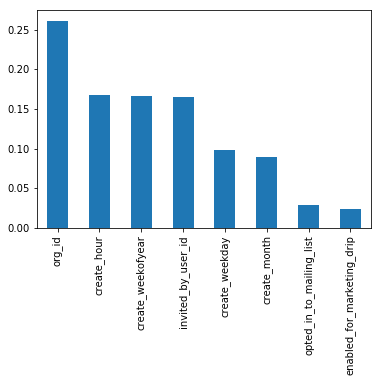

In [110]:
imp_feats=pd.Series(random.feature_importances_,index=features_1.columns)
imp_feats.sort_values(ascending=False).plot(kind='Bar')